Black friday dataset
EDA, feature engineering and model traning


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Importing Black Friday Train data 


In [2]:
df_train=pd.read_csv("C:/Users/Akshay/Documents/Akshay/DATA/Blackfriday1/train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


##Importing Black friday test data 


In [3]:
df_test=pd.read_csv("C:/Users/Akshay/Documents/Akshay/DATA/Blackfriday/test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


##merge train and test data

In [4]:
final_df=df_train.append(df_test)
final_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
final_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
final_df.drop(['User_ID'],axis=1,inplace=True)

In [8]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
final_df['Gender']=final_df['Gender'].map({'F':0,'M':1})
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
final_df_gender=final_df['gender']=pd.get_dummies(final_df['Gender'],drop_first=1)

In [11]:
final_df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
final_df['Age']=final_df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [13]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

final_df['Age']= label_encoder.fit_transform(final_df['Age'])

final_df['Age'].unique()


array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [14]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,gender
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,1


In [15]:
final_df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
final_df_city=pd.get_dummies(final_df['City_Category'],drop_first=1)

In [17]:
final_df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [18]:
final_df=pd.concat([final_df,final_df_city],axis=1)

In [19]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,gender,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,1,0,1


In [20]:
final_df.drop("City_Category",axis=1,inplace=True)

In [21]:
final_df.drop("gender",axis=1,inplace=True)

In [22]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


#Check missing values

In [23]:
final_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

##Product_category_2 has null values we have to replace them with mode as its a descrete feature

In [24]:
final_df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [25]:
final_df['Product_Category_2'].mode()[0]

8.0

In [26]:
final_df["Product_Category_2"]= final_df["Product_Category_2"].fillna(final_df["Product_Category_2"].mode()[0])

In [27]:
final_df['Product_Category_2'].isnull().sum()

0

In [28]:
final_df['Product_Category_2'].value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

##Product_category_3 has null values we have to replace them with mode as its a descrete feature

In [29]:
final_df['Product_Category_3'].isnull().sum()

545809

In [30]:
final_df["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [31]:
final_df["Product_Category_3"].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [32]:
final_df["Product_Category_3"].mode()[0]

16.0

In [33]:
final_df["Product_Category_3"]=final_df["Product_Category_3"].fillna(final_df["Product_Category_3"].mode()[0])

In [34]:
final_df["Product_Category_3"].isnull().sum()

0

In [35]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,0,1


In [36]:
final_df["Stay_In_Current_City_Years"]=final_df["Stay_In_Current_City_Years"].str.replace("+"," ")

C:\Users\Akshay\AppData\Local\Temp/ipykernel_1524/2846831034.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_df["Stay_In_Current_City_Years"]=final_df["Stay_In_Current_City_Years"].str.replace("+"," ")


In [37]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


## convert Stay_In_Current_City_Years which is object into integer

In [38]:
final_df["Stay_In_Current_City_Years"]=final_df["Stay_In_Current_City_Years"].astype(int)

In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [64]:
final_df["B"]=final_df["B"].astype(int)

In [65]:
final_df["C"]=final_df["C"].astype(int)

In [66]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 78.9 MB


##Visualization Age vs Purchase

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

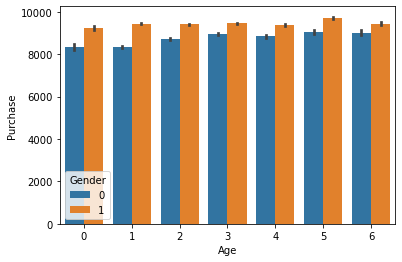

In [43]:
sns.barplot('Age','Purchase',hue='Gender',data=final_df)

## Purchase ratio of man in more than female

##Visualization of purchase with occupations

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase', ylabel='Occupation'>

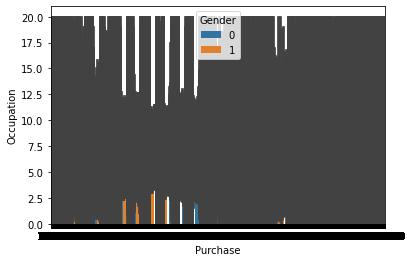

In [44]:
sns.barplot('Purchase','Occupation',hue= 'Gender',data=final_df)

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

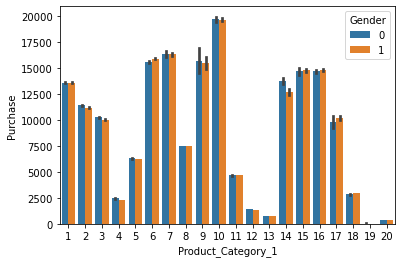

In [45]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=final_df)

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

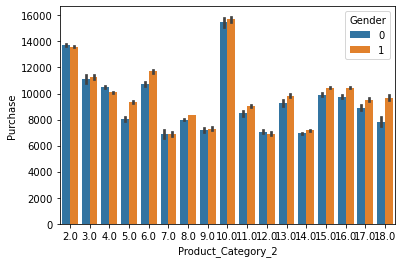

In [46]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=final_df)

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

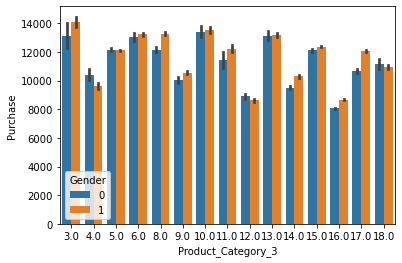

In [47]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=final_df)

In [48]:
final_df.drop("Product_ID",axis=1,inplace=True)

In [49]:
final_df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


##feature scaling

In [50]:
final_df_test=final_df[final_df['Purchase'].isnull()]

In [51]:
final_df_train=final_df[~final_df['Purchase'].isnull()]

In [52]:
X=final_df_train.drop("Purchase",axis=1)
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,0,10,2,0,3,8.0,16.0,0,0
1,0,0,10,2,0,1,6.0,14.0,0,0
2,0,0,10,2,0,12,8.0,16.0,0,0
3,0,0,10,2,0,12,14.0,16.0,0,0
4,1,6,16,4,0,8,8.0,16.0,0,1


In [53]:
X.shape

(550068, 10)

In [54]:
Y=final_df_train["Purchase"]

In [55]:
Y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [56]:
Y.shape

(550068,)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size=0.2, random_state=42)

In [58]:
##feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

##Train model

In [59]:
train_test_split(Y_test, shuffle=False)

[84432     19142.0
 72724     15513.0
 197032     7802.0
 353704    15455.0
 91198      4492.0
            ...   
 508334    15748.0
 538071    20895.0
 110228     2132.0
 507674    10976.0
 189988    12280.0
 Name: Purchase, Length: 82510, dtype: float64,
 129112    19101.0
 362199    19490.0
 131764     3497.0
 298865     7886.0
 239452    16390.0
            ...   
 133324    19139.0
 138718     7856.0
 22886      4037.0
 137110     7467.0
 515193     8002.0
 Name: Purchase, Length: 27504, dtype: float64]

In [60]:
train_test_split(Y_train, shuffle=False)

[178247     7800.0
 196647     8677.0
 418590     7966.0
 408727     9852.0
 216416    15804.0
            ...   
 315649    11753.0
 55226      4794.0
 373069    19106.0
 194417     4139.0
 297173    16990.0
 Name: Purchase, Length: 330040, dtype: float64,
 279132    13252.0
 104540     8884.0
 231924     8027.0
 305778     7068.0
 323297     8289.0
            ...   
 110268     1862.0
 259178     8623.0
 365838     6954.0
 131932     6151.0
 121958     7146.0
 Name: Purchase, Length: 110014, dtype: float64]

In [61]:
train_test_split(X_test, shuffle=False)

[array([[ 0.57161057,  1.85014027,  1.67524447, ...,  0.36894971,
         -0.85065466,  1.48727241],
        [-1.74944281,  0.3725276 ,  0.44842847, ...,  0.36894971,
          1.17556518, -0.67237178],
        [-1.74944281,  0.3725276 , -1.23844354, ...,  0.36894971,
         -0.85065466, -0.67237178],
        ...,
        [ 0.57161057,  0.3725276 , -0.93173954, ...,  0.36894971,
          1.17556518, -0.67237178],
        [-1.74944281,  1.11133394, -1.08509154, ...,  0.36894971,
          1.17556518, -0.67237178],
        [ 0.57161057, -1.10508507, -0.47168354, ..., -1.82187712,
         -0.85065466, -0.67237178]]),
 array([[ 0.57161057,  2.58894661, -0.16497953, ..., -2.18701492,
         -0.85065466,  1.48727241],
        [ 0.57161057, -0.36627874, -0.62503554, ...,  0.0038119 ,
         -0.85065466,  1.48727241],
        [ 0.57161057, -0.36627874, -0.47168354, ...,  0.36894971,
          1.17556518, -0.67237178],
        ...,
        [ 0.57161057,  0.3725276 ,  1.82859647, ...,  

In [62]:
train_test_split(X_train, shuffle=False)

[array([[ 0.57161057,  1.85014027, -0.16497953, ...,  0.36894971,
          1.17556518, -0.67237178],
        [ 0.57161057, -1.10508507,  0.60178047, ...,  0.36894971,
         -0.85065466,  1.48727241],
        [ 0.57161057, -0.36627874, -0.47168354, ...,  0.73408751,
          1.17556518, -0.67237178],
        ...,
        [ 0.57161057, -1.10508507, -0.62503554, ..., -0.3613259 ,
         -0.85065466,  1.48727241],
        [ 0.57161057,  1.11133394, -1.08509154, ...,  0.36894971,
          1.17556518, -0.67237178],
        [-1.74944281, -0.36627874, -1.23844354, ...,  0.36894971,
          1.17556518, -0.67237178]]),
 array([[-1.74944281, -0.36627874, -1.23844354, ..., -2.55215273,
          1.17556518, -0.67237178],
        [-1.74944281, -1.84389141,  0.29507647, ...,  0.36894971,
          1.17556518, -0.67237178],
        [ 0.57161057,  2.58894661,  0.90848447, ...,  0.36894971,
         -0.85065466,  1.48727241],
        ...,
        [-1.74944281, -1.10508507, -1.08509154, ...,  

In [63]:
max(-0.0,0.0)

-0.0